In [1]:
#Importing library
import pandas as pd
import plotnine
from plotnine import *

In [2]:
# if you want to upload your file by selecting file
# from google.colab import files
# uploaded = files.upload()

In [3]:
iris=pd.read_csv("iris_dataset.txt", sep=" ")
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
sepal_length=iris[["Sepal.Length","Species"]]
sepal_length

,Sepal.Length,Species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


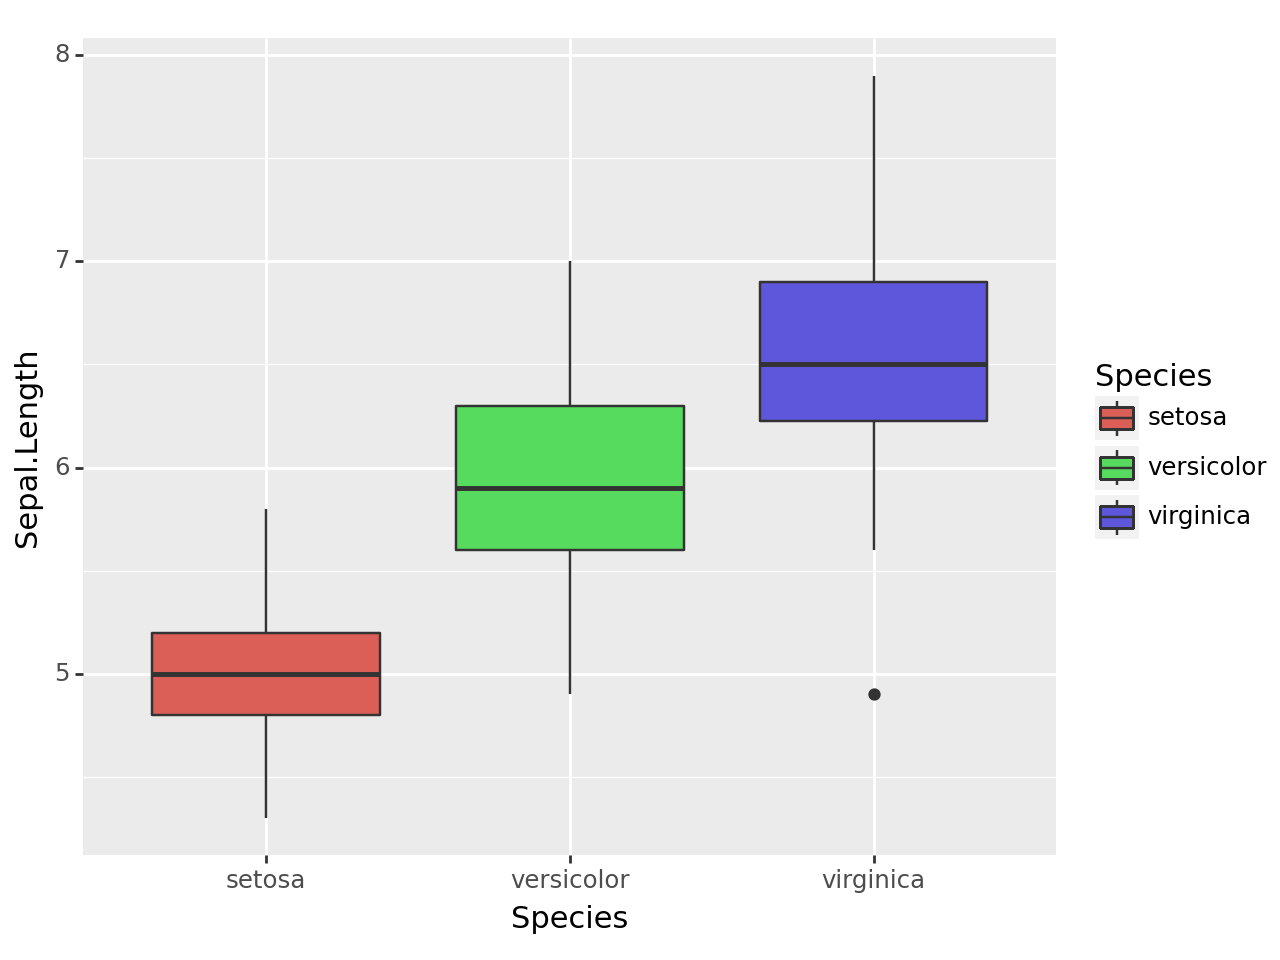

In [7]:
# Create a boxplot
graph1=(ggplot(sepal_length) + aes(x="Species", y="Sepal.Length", fill="Species")) + geom_boxplot()
print(graph1)

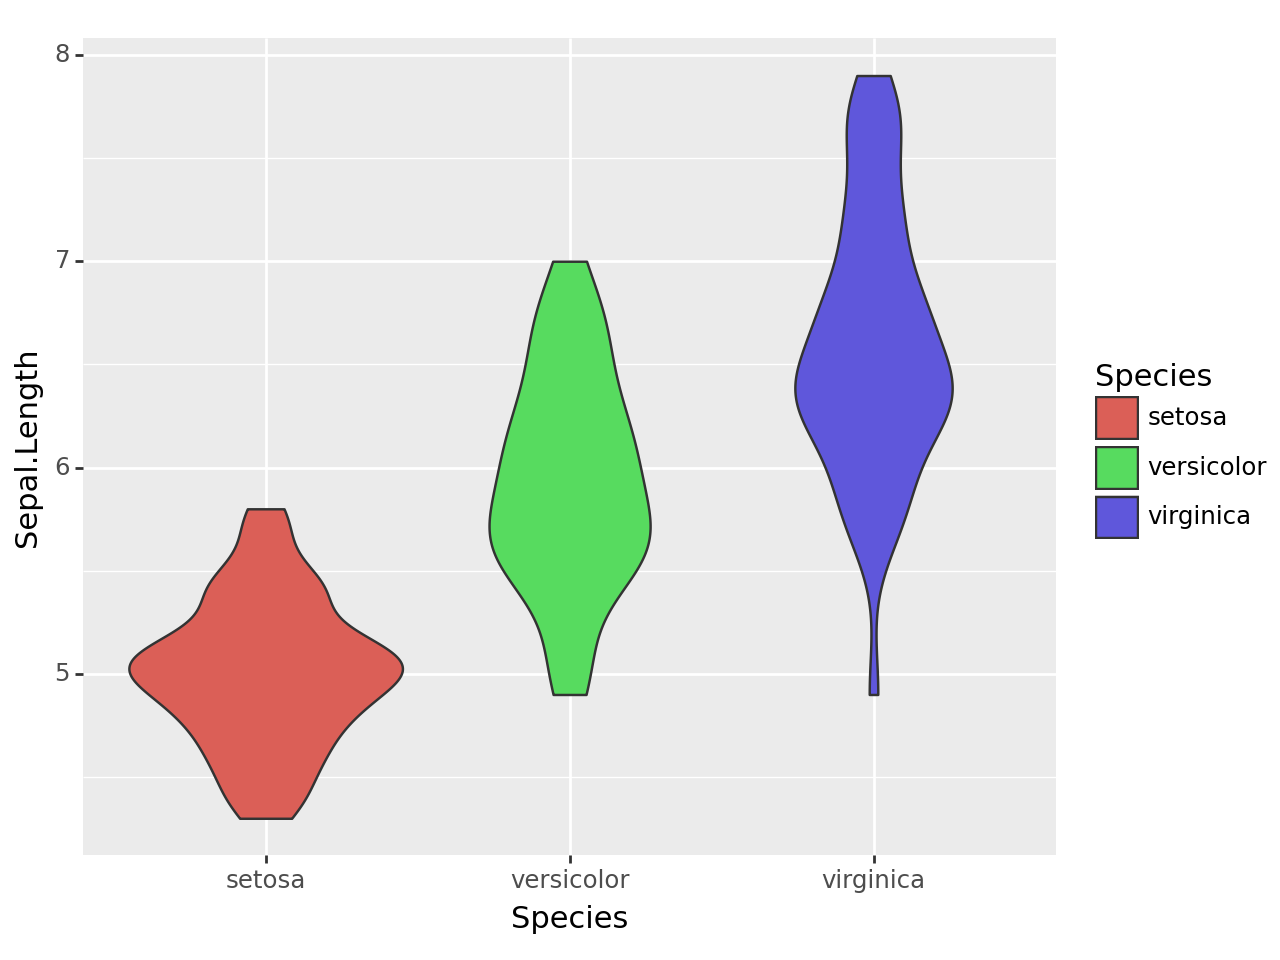

In [8]:
# Create a violinplot
graph2=(ggplot(sepal_length) + aes(x="Species", y="Sepal.Length", fill="Species")) + geom_violin()
print(graph2)

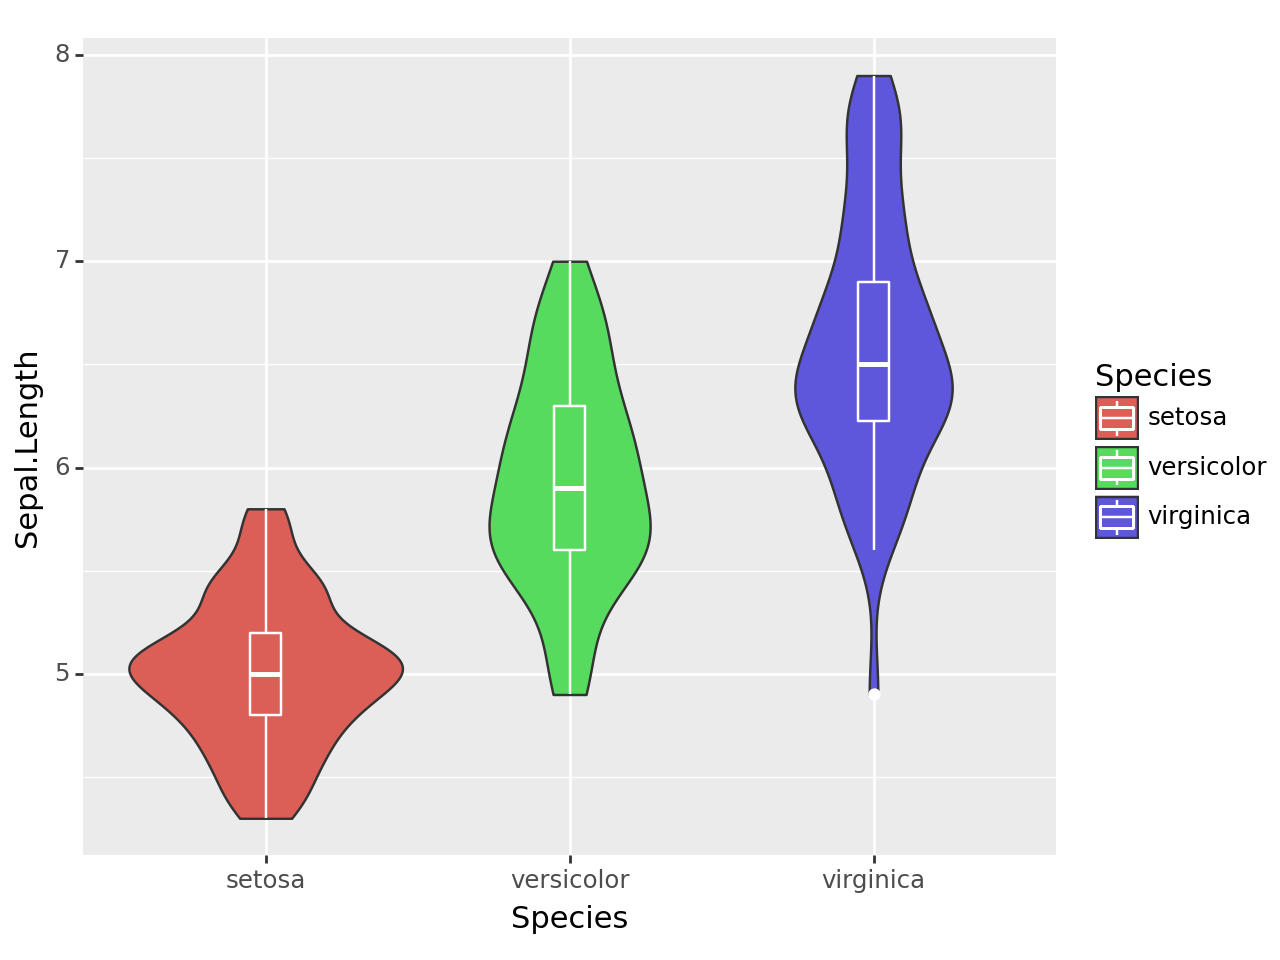

In [10]:
# Create a violinplot + boxplot together
graph3=(ggplot(sepal_length) + aes(x="Species", y="Sepal.Length", fill="Species")) + geom_violin() + geom_boxplot(width=0.1, color="white")
print(graph3)

In [11]:
mean_sl=sepal_length.groupby(["Species"])["Sepal.Length"].mean()
#hg2.groupby(["Chr_type"])["Gene_density_per_megabase"].mean()
print(mean_sl)
print(type(mean_sl))


Species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: Sepal.Length, dtype: float64
<class 'pandas.core.series.Series'>


In [12]:
print(type(mean_sl))
means=mean_sl.to_list()
print(means)

<class 'pandas.core.series.Series'>
[5.006, 5.936, 6.587999999999999]


In [13]:
std_sl=sepal_length.groupby(["Species"])["Sepal.Length"].std()
std_sl
stds_sl=std_sl.to_list()
print(stds_sl)

[0.3524896872134513, 0.5161711470638635, 0.635879593274432]


In [16]:
data={
      "Species":["setosa","versicolor","virginica"],
      "mean":means,"sd":stds_sl
}
data

{'Species': ['setosa', 'versicolor', 'virginica'],
 'mean': [5.006, 5.936, 6.587999999999999],
 'sd': [0.3524896872134513, 0.5161711470638635, 0.635879593274432]}

In [17]:
data1=pd.DataFrame(data)
data1

,Species,mean,sd
0,setosa,5.006,0.352490
1,versicolor,5.936,0.516171
2,virginica,6.588,0.635880


In [18]:
# import ggplot with all tools
from plotnine import *

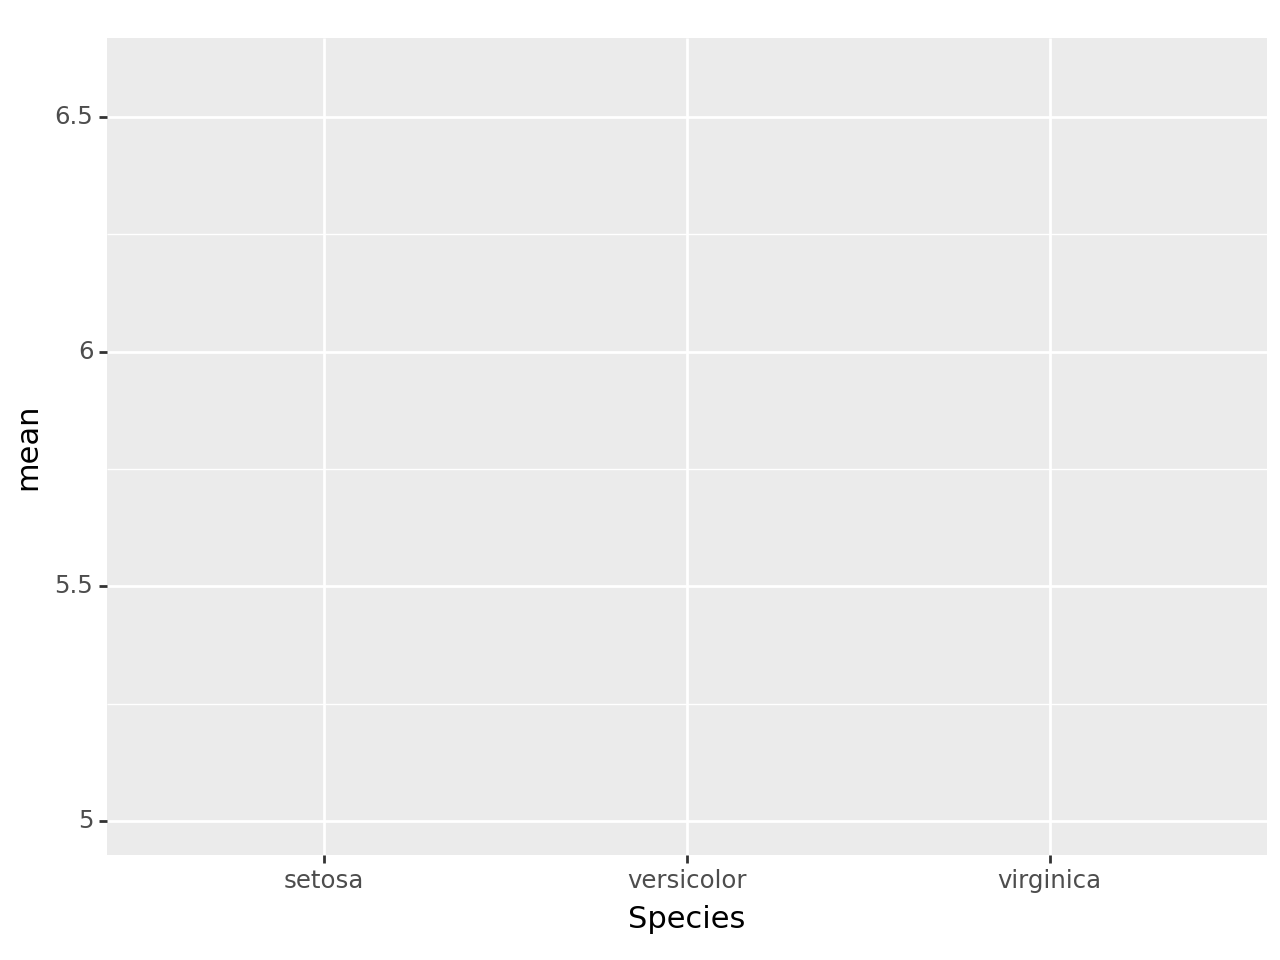

In [19]:
graph4=(ggplot(data1) + aes(x="Species", y="mean"))
graph4

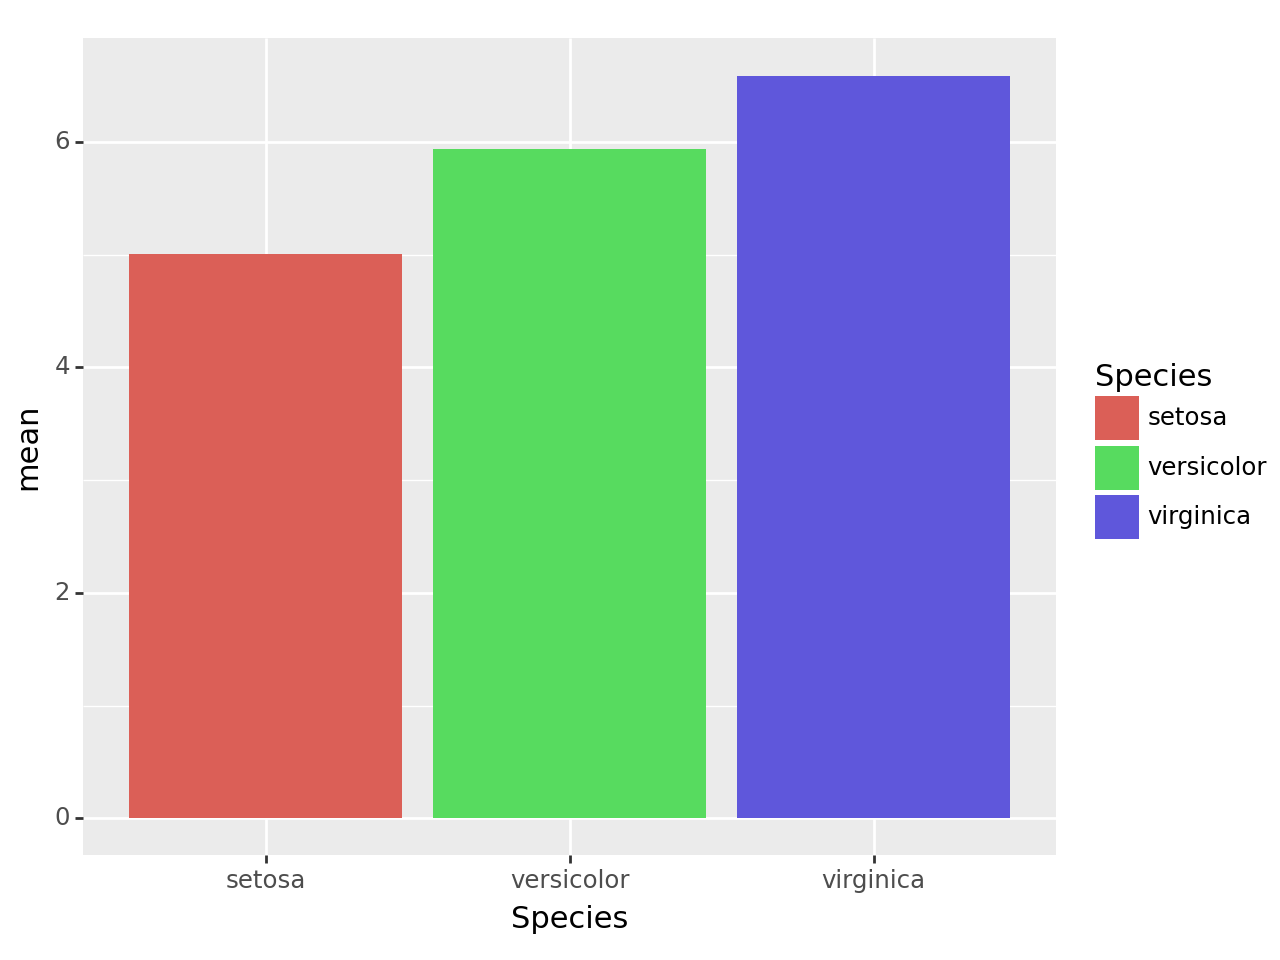

<Figure Size: (640 x 480)>

In [20]:
graph5=graph4 + geom_col() + aes(fill="Species")
graph5

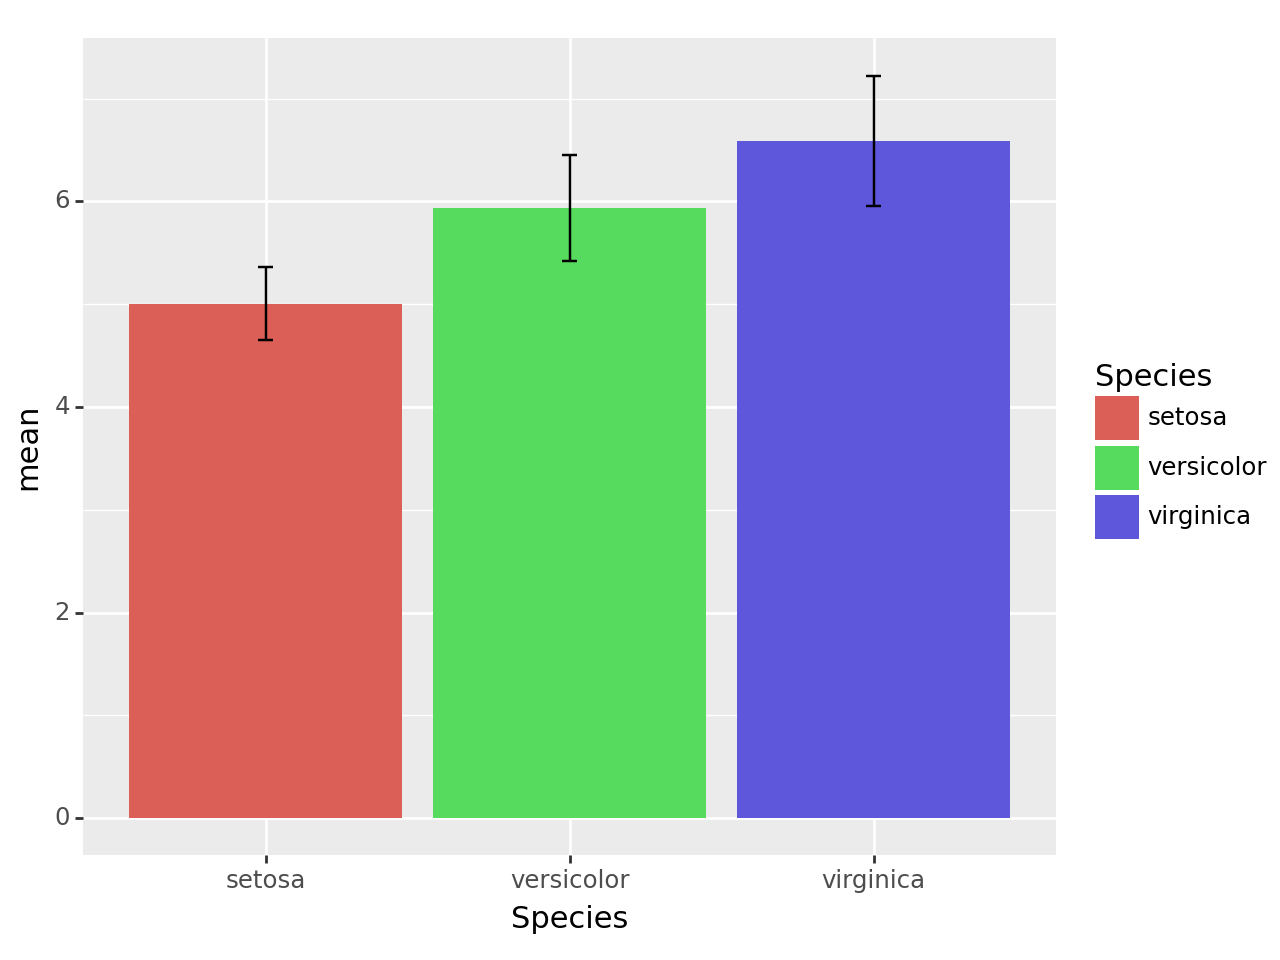

<Figure Size: (640 x 480)>

In [21]:
# adding eerrorbar
graph6=graph5 + geom_errorbar(aes(x="Species",ymin=data1["mean"] - data1["sd"], ymax=data1["mean"] + data1["sd"], width=0.05))
graph6

In [22]:
# Assignment
# Use the iris data set to show the spread of values for Petal Length Species wise
# Also calculate the mean per species and plot along with the error bar

iris
petal_length=iris[["Petal.Length","Species"]]
petal_length

,Petal.Length,Species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa
...,...,...
145,5.2,virginica
146,5.0,virginica
147,5.2,virginica
148,5.4,virginica


In [27]:
mean_pl=petal_length.groupby(["Species"])["Petal.Length"].mean()
print(mean_pl)
print(type(mean_pl))

print(type(mean_pl))
means_pl=mean_pl.to_list()
print(means_pl)

std_pl=petal_length.groupby(["Species"])["Petal.Length"].std()
std_pl
stds_pl=std_pl.to_list()
print(stds_pl)

data2={
      "Species":["setosa","versicolor","virginica"],
      "mean":means_pl,"sd":stds_pl
}
data2

data3=pd.DataFrame(data2)
data3

Species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: Petal.Length, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[1.462, 4.26, 5.5520000000000005]
[0.1736639964801841, 0.46991097723995784, 0.5518946956639835]


,Species,mean,sd
0,setosa,1.462,0.173664
1,versicolor,4.260,0.469911
2,virginica,5.552,0.551895


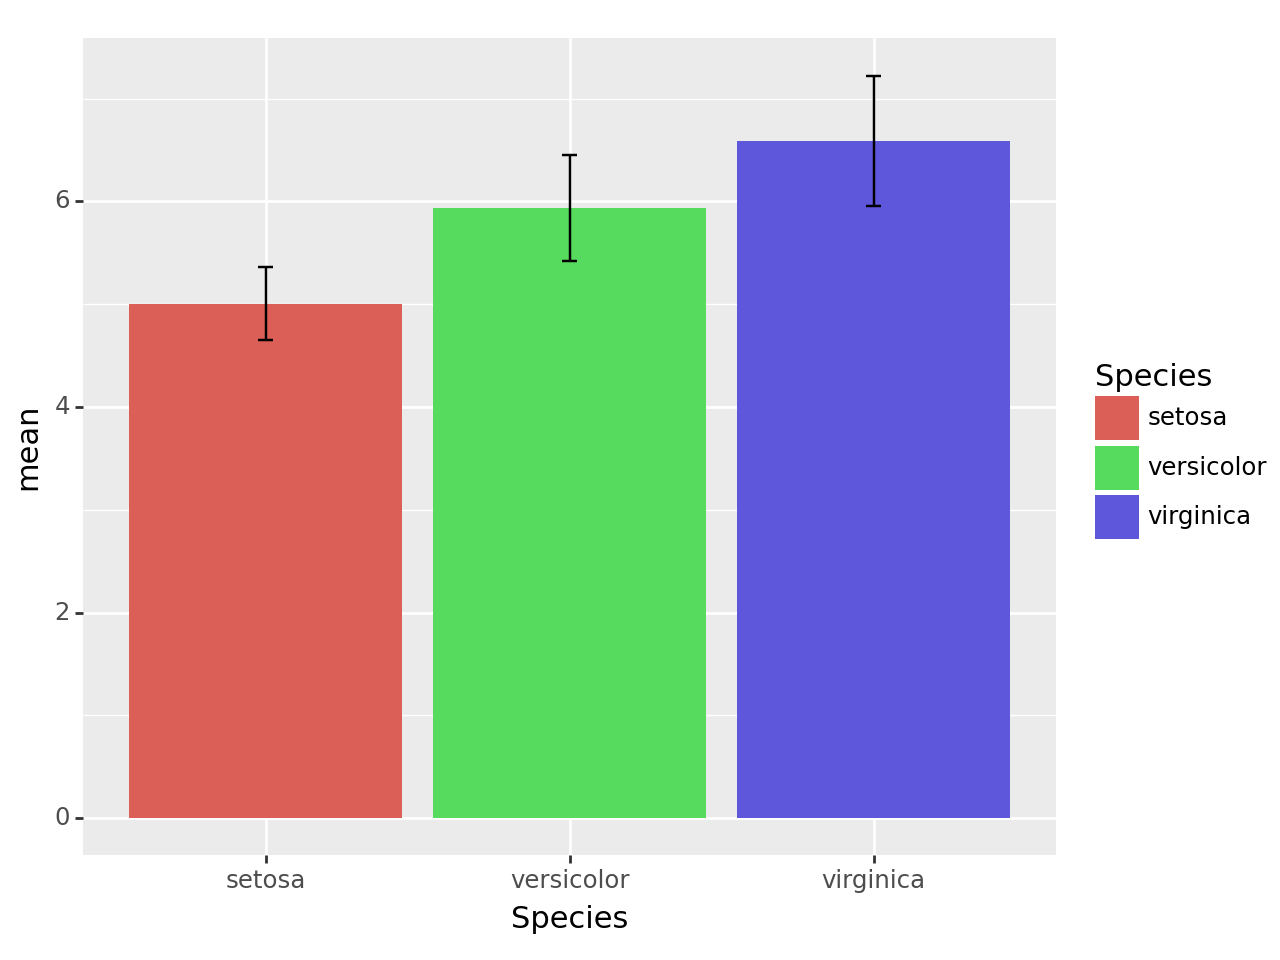

<Figure Size: (640 x 480)>

In [28]:
graph7=(ggplot(data3) + aes(x="Species", y="mean"))
graph7

graph8=graph7 + geom_col() + aes(fill="Species")
graph8

# adding eerrorbar
graph9=graph8 + geom_errorbar(aes(x="Species",ymin=data3["mean"] - data3["sd"], ymax=data3["mean"] + data3["sd"], width=0.05))
graph6